# 使用dplyr处理关系数据

此部分包括表之间的合并连接、筛选连接以及集合操作

In [1]:
library(tidyverse)
library(nycflights13)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


nycflights13包含与flights相关的4个表

flights前面已经用过；airlines航空公司的缩写码及全名；airports给出了每个机场的信息；planes给出了每架飞机的信息；weather给出的是天气状况

In [2]:
# 5个表的内容如下
flights %>% head()
airlines %>% head()
airports %>% head()
planes %>% head()
weather %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.


faa,name,lat,lon,alt,tz,dst,tzone
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
04G,Lansdowne Airport,41.13047,-80.61958,1044,-5,A,America/New_York
06A,Moton Field Municipal Airport,32.46057,-85.68003,264,-6,A,America/Chicago
06C,Schaumburg Regional,41.98934,-88.10124,801,-6,A,America/Chicago
06N,Randall Airport,41.43191,-74.39156,523,-5,A,America/New_York
09J,Jekyll Island Airport,31.07447,-81.42778,11,-5,A,America/New_York
0A9,Elizabethton Municipal Airport,36.37122,-82.17342,1593,-5,A,America/New_York


tailnum,year,type,manufacturer,model,engines,seats,speed,engine
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NA,Turbo-fan
N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N105UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan


origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


用于连接每对数据表的变量称为键

键分为主键和外键

主键：唯一标识其所在数据表中的观测。例如，planes$tailnum是一个主键，因为其可以唯一标识planes表中的每架飞机。

外键：唯一标识另一个数据表中的观测。例如，flights$tailnum是一个外键，因为其出现在flights表中，并可以将每次航班与唯一一架飞机匹配。

一个变量既可以是主键，也可以是外键

In [3]:
# 识别是否是主键可以用count()验证
planes %>% count(tailnum) %>% filter(n > 1)

weather %>% count(year, month, day, hour, origin) %>% 
filter(n > 1)# 不是

flights %>% count(year, month, day, flight) %>% 
filter(n > 1) %>% head()

flights %>% count(year, month, day, tailnum) %>% 
filter(n > 1) %>% head()

tailnum,n
<chr>,<int>


year,month,day,hour,origin,n
<int>,<int>,<int>,<int>,<chr>,<int>
2013,11,3,1,EWR,2
2013,11,3,1,JFK,2
2013,11,3,1,LGA,2


year,month,day,flight,n
<int>,<int>,<int>,<int>,<int>
2013,1,1,1,2
2013,1,1,3,2
2013,1,1,4,2
2013,1,1,11,3
2013,1,1,15,2
2013,1,1,21,2


year,month,day,tailnum,n
<int>,<int>,<int>,<chr>,<int>
2013,1,1,N0EGMQ,2
2013,1,1,N11189,2
2013,1,1,N11536,2
2013,1,1,N11544,3
2013,1,1,N11551,2
2013,1,1,N12540,2


如果一张表没有主键，有时就需要使用mutate()函数和row_number()函数为表加上一个主键。这样一来，如果你完成了一些筛选工作，并想要使用原始数据检查的话，就可以更容易地匹配观测。这种主键称为代理键。

In [4]:
flights %>% arrange(year, month, day, flight, tailnum, 
                  origin, dest) %>% head()
# filter(n > 1) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,856,900,-4,1226,1220,6,AA,1,N324AA,JFK,LAX,358,2475,9,0,2013-01-01 09:00:00
2013,1,1,1153,1123,30,1454,1425,29,B6,1,N552JB,JFK,FLL,167,1069,11,23,2013-01-01 11:00:00
2013,1,1,1155,1200,-5,1517,1510,7,AA,3,N322AA,JFK,LAX,353,2475,12,0,2013-01-01 12:00:00
2013,1,1,805,800,5,1118,1106,12,B6,3,N570JB,JFK,FLL,165,1069,8,0,2013-01-01 08:00:00
2013,1,1,1538,1540,-2,1827,1851,-24,DL,4,N372DA,JFK,MCO,133,944,15,40,2013-01-01 15:00:00
2013,1,1,933,937,-4,1057,1102,-5,B6,4,N503JB,JFK,BUF,66,301,9,37,2013-01-01 09:00:00


In [5]:
# 为flights添加代理键
flights %>%
  arrange(year, month, day, sched_dep_time, 
          carrier, flight) %>% 
mutate(flight_id = row_number()) %>% head()
# 这是我找的代理键
# row_number()函数是排秩的后面有两个例子

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,flight_id
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,1
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,2
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,3
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,4
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,5
2013,1,1,559,559,0,702,706,-4,B6,1806,N708JB,JFK,BOS,44,187,5,59,2013-01-01 05:00:00,6


In [6]:
flights %>%
  arrange(year, month, day, sched_dep_time, carrier, flight) %>%
  mutate(flight_id = row_number()) %>%
  glimpse()

# 这是网上找的，glimpse()函数看着理解吧

Observations: 336,776
Variables: 20
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ dep_time       <int> 517, 533, 542, 544, 554, 559, 558, 559, 558, 558, 557…
$ sched_dep_time <int> 515, 529, 540, 545, 558, 559, 600, 600, 600, 600, 600…
$ dep_delay      <dbl> 2, 4, 2, -1, -4, 0, -2, -1, -2, -2, -3, NA, 1, 0, -5,…
$ arr_time       <int> 830, 850, 923, 1004, 740, 702, 753, 941, 849, 853, 83…
$ sched_arr_time <int> 819, 830, 850, 1022, 728, 706, 745, 910, 851, 856, 84…
$ arr_delay      <dbl> 11, 20, 33, -18, 12, -4, 8, 31, -2, -3, -8, NA, -6, -…
$ carrier        <chr> "UA", "UA", "AA", "B6", "UA", "B6", "AA", "AA", "B6",…
$ flight         <int> 1545, 1714, 1141, 725, 1696, 1806, 301, 707, 49, 71, …
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N39463", "N7…
$ origin         <chr> "EWR"

In [7]:
# 例子
mutate(mtcars, row_number() == 1L) %>% head()

mtcars %>% filter(between(row_number(), 1, 10)) %>% head()

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,row_number() == 1L
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,TRUE
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,FALSE
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,FALSE
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,FALSE
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,FALSE
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,FALSE


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [8]:
# 找以下数据集中的键
# 需要安装包
Lahman::Batting %>% head()
babynames::babynames %>% head()
nasaweather::atmos %>% head()
fueleconomy::vehicles %>% head()
ggplot2::diamonds %>% head()
# 其实就是先了解数据，通过count()和filter()筛选看是否大于1

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abercda01,1871,1,TRO,NA,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,0
armstbo01,1871,1,FW1,NA,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,0


year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


lat,long,year,month,surftemp,temp,pressure,ozone,cloudlow,cloudmid,cloudhigh
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
36.20000,-113.8,1995,1,272.7,272.1,835,304,7.5,34.5,26.0
33.70435,-113.8,1995,1,279.5,282.2,940,304,11.5,32.5,20.0
31.20870,-113.8,1995,1,284.7,285.2,960,298,16.5,26.0,16.0
28.71304,-113.8,1995,1,289.3,290.7,990,276,20.5,14.5,13.0
26.21739,-113.8,1995,1,292.2,292.7,1000,274,26.0,10.5,7.5
23.72174,-113.8,1995,1,294.1,293.6,1000,264,30.0,9.5,8.0


id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>
27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,17,18
28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4,2.5,Regular,17,18
27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,13,13
28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6,4.2,Regular,13,13
1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4,2.5,Regular,17,16
1033,AM General,Post Office DJ8 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,6,4.2,Regular,13,13


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


## 　合并连接

合并连接通过键的匹配将两个表的变量组合起来，和mutate()函数一样，连接函数会将变量添加在表的右侧

In [9]:
# 从flights数据集中选择一部分
flights2 <- flights %>% select(year:day, hour, origin, dest, tailnum, carrier)
flights2 %>% head()

year,month,day,hour,origin,dest,tailnum,carrier
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA
2013,1,1,5,LGA,IAH,N24211,UA
2013,1,1,5,JFK,MIA,N619AA,AA
2013,1,1,5,JFK,BQN,N804JB,B6
2013,1,1,6,LGA,ATL,N668DN,DL
2013,1,1,5,EWR,ORD,N39463,UA


In [10]:
# 将airlines数据加入到flights2中
flights2 %>% select(-origin,  -dest, -hour) %>% 
left_join(airlines, by = "carrier") %>% head()
# "-"在这里是去掉这些变量的意思
# 让我们选择几个变量连接
flights2 %>% select(year, month, day, dest, carrier) %>%
left_join(airlines, by = "carrier") %>% head()
# 还是要对前面学过的了解

year,month,day,tailnum,carrier,name
<int>,<int>,<int>,<chr>,<chr>,<chr>
2013,1,1,N14228,UA,United Air Lines Inc.
2013,1,1,N24211,UA,United Air Lines Inc.
2013,1,1,N619AA,AA,American Airlines Inc.
2013,1,1,N804JB,B6,JetBlue Airways
2013,1,1,N668DN,DL,Delta Air Lines Inc.
2013,1,1,N39463,UA,United Air Lines Inc.


year,month,day,dest,carrier,name
<int>,<int>,<int>,<chr>,<chr>,<chr>
2013,1,1,IAH,UA,United Air Lines Inc.
2013,1,1,IAH,UA,United Air Lines Inc.
2013,1,1,MIA,AA,American Airlines Inc.
2013,1,1,BQN,B6,JetBlue Airways
2013,1,1,ATL,DL,Delta Air Lines Inc.
2013,1,1,ORD,UA,United Air Lines Inc.


In [11]:
# 使用mutate()函数和R取子集的方法也可以达到同样的效果
flights2 %>% select(-origin, -dest) %>%
mutate(name = airlines$name[match(carrier, 
                                  airlines$carrier)]) %>% 
head()

year,month,day,hour,tailnum,carrier,name
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
2013,1,1,5,N14228,UA,United Air Lines Inc.
2013,1,1,5,N24211,UA,United Air Lines Inc.
2013,1,1,5,N619AA,AA,American Airlines Inc.
2013,1,1,5,N804JB,B6,JetBlue Airways
2013,1,1,6,N668DN,DL,Delta Air Lines Inc.
2013,1,1,5,N39463,UA,United Air Lines Inc.


In [12]:
# 如果对上面的操作不理解，看一看下面分解的操作
match(flights2$carrier, airlines$carrier) %>% head()
airlines$name[match(flights2$carrier, airlines$carrier)] %>% head()
airlines$name[c(12,12,2,4,5,12)]
# match()匹配返回行号，然后就是数据框取子集

[1] 12 12  2  4  5 12

[1] "United Air Lines Inc."  "United Air Lines Inc."  "American Airlines Inc."
[4] "JetBlue Airways"        "Delta Air Lines Inc."   "United Air Lines Inc."

[1] "United Air Lines Inc."  "United Air Lines Inc."  "American Airlines Inc."
[4] "JetBlue Airways"        "Delta Air Lines Inc."   "United Air Lines Inc."

In [13]:
# 用例子来说明连接的原理
x <- tribble(
~key, ~val_x,
1,"x1",
2, "x2",
3, "x3")

y <- tribble(
~key, ~val_y,
1, "y1",
2, "y2",
4, "y3")
x
y


key,val_x
<dbl>,<chr>
1,x1
2,x2
3,x3


key,val_y
<dbl>,<chr>
1,y1
2,y2
4,y3


## 内连接

内连接是等值连接，没有匹配的行不会被包含

In [14]:
# 看例子
x %>% inner_join(y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2


## 外连接

外连接则保留至少存在于一个表中的观测，有3种类型

左连接；右连接；全连接

In [15]:
# 看例子
x %>% left_join(y, by = "key")

x %>% right_join(y, by = "key")

x %>% full_join(y, by = "key")
# 没有匹配到的会以NA填充
# 左连接最为常用

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
3,x3,NA


key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
4,NA,y3


key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
3,x3,NA
4,NA,y3


## 重复键

当键不唯一时会出现两种情况


In [16]:
# 一对多
x <-tribble( 
    ~key, ~val_x, 
    1, "x1", 
    2, "x2", 
    2, "x3", 
    1, "x4") 
y <-tribble( 
    ~key, ~val_y, 
    1, "y1", 
    2, "y2") 
left_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
2,x3,y2
1,x4,y1


In [17]:
# 多对多
x <-tribble( 
    ~key, ~val_x, 
    1, "x1", 
    2, "x2", 
    2, "x3", 
    3, "x4") 
y <-tribble( 
    ~key, ~val_y, 
    1, "y1", 
    2, "y2", 
    2, "y3", 
    3, "y4")
left_join(x, y, by = "key")
# 多对多会得到所有可能的组合(笛卡尔积)
# 多对多意味着两张表都有重复的键，往往意味着出现了错误

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
2,x2,y3
2,x3,y2
2,x3,y3
3,x4,y4


In [18]:
# 定义键列
# 自然连接：使用所有共存的变量连接
flights2 %>% left_join(weather) %>% head()

Joining, by = c("year", "month", "day", "hour", "origin")


year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250,14.96014,21.86482,0,1011.4,10,2013-01-01 05:00:00
2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,5,JFK,BQN,N804JB,B6,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,6,LGA,ATL,N668DN,DL,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,5,EWR,ORD,N39463,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00


In [19]:
# by = "x" 则只使用选定的公共变量
flights2 %>% left_join(planes, by = "tailnum") %>% head()

year.x,month,day,hour,origin,dest,tailnum,carrier,year.y,type,manufacturer,model,engines,seats,speed,engine
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,1999,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,LGA,IAH,N24211,UA,1998,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,JFK,MIA,N619AA,AA,1990,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,1,1,5,JFK,BQN,N804JB,B6,2012,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,ATL,N668DN,DL,1991,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,1,1,5,EWR,ORD,N39463,UA,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan


In [20]:
# by = c("a"="b")这种方式会匹配x表中的a变量和y表中的b变量。
# 输出结果中使用的是x表中的变量。

flights2 %>% left_join(airports, by = c("dest" = "faa")) %>% 
head()

flights2 %>% left_join(airports, by = c("origin" = "faa")) %>%
head()

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,LGA,IAH,N24211,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,JFK,MIA,N619AA,AA,Miami Intl,25.79325,-80.29056,8,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,NA,NA,NA,NA,NA,NA,NA
2013,1,1,6,LGA,ATL,N668DN,DL,Hartsfield Jackson Atlanta Intl,33.63672,-84.42807,1026,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Chicago Ohare Intl,41.97860,-87.90484,668,-6,A,America/Chicago


year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,5,LGA,IAH,N24211,UA,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,JFK,MIA,N619AA,AA,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,6,LGA,ATL,N668DN,DL,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York


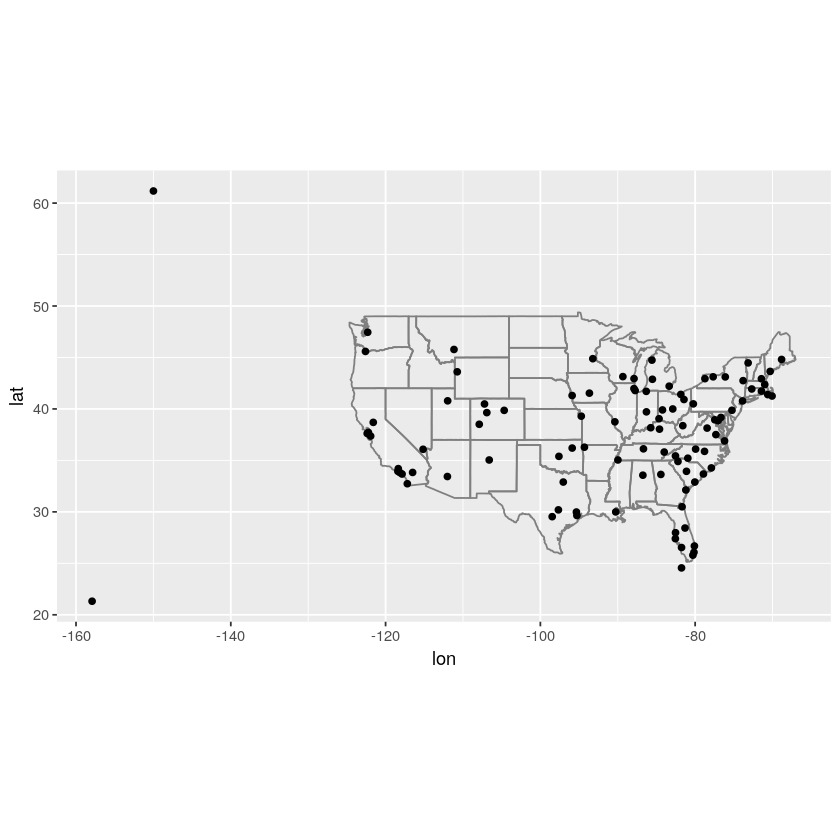

In [21]:
airports %>% semi_join(flights, c("faa" = "dest"))%>%
ggplot(aes(lon, lat)) + 
borders("state") + 
geom_point() + 
coord_quickmap()

base::merge()函数可以实现所有4种合并连接操作。

dplyrmergeinner_join(x, y)-->merge(x, y)

left_join(x, y)-->merge(x, y, all.x = TRUE)

right_join(x, y)-->merge(x, y, all.y = TRUE)

full_join(x, y)-->merge(x, y, all.x = TRUE, all.y = TRUE

## 筛选连接

筛选连接匹配观测的方式与合并连接相同，但前者影响的是观测，而不是变量。

筛选连接有两种类型。

semi_join(x, y)：保留x表中与y表中的观测相匹配的所有观测。

anti_join(x, y)：丢弃x表中与y表中的观测相匹配的所有观测

In [22]:
(top_dest <- flights %>% count(dest, sort = T) %>% head(10))

flights %>% filter(dest %in% top_dest$dest) %>% head()

dest,n
<chr>,<int>
ORD,17283
ATL,17215
LAX,16174
BOS,15508
MCO,14082
CLT,14064
SFO,13331
FLL,12055
MIA,11728


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [23]:
flights %>% semi_join(top_dest) %>% head()

Joining, by = "dest"


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [24]:
flights %>% anti_join(planes, by = "tailnum") %>% 
count(tailnum, sort = T) %>% head()

tailnum,n
<chr>,<int>
NA,2512
N725MQ,575
N722MQ,513
N723MQ,507
N713MQ,483
N735MQ,396


In [25]:
airports %>% count(alt, lon) %>% filter(n > 1) %>% head()

alt,lon,n
<dbl>,<dbl>,<int>


## 集合操作

intersect(x, y)返回既在x表，又在y表中的观测。

union(x, y)返回x表或y表中的唯一观测。

setdiff(x, y)返回在x表，但不在y表中的观测。

In [26]:
df1 <-tribble( 
    ~x, ~y, 
    1,  1, 
    2,  1) 
df2 <-tribble( 
    ~x, ~y, 
    1,  1, 
    1,  2)
intersect(df1, df2)

union(df1,df2)

setdiff(df1, df2)

setdiff(df2, df1)

x,y
<dbl>,<dbl>
1,1


x,y
<dbl>,<dbl>
1,1
2,1
1,2


x,y
<dbl>,<dbl>
2,1


x,y
<dbl>,<dbl>
1,2


这一章后面写的比较简单，也写的比较少，一方面是对数据不熟，另一方面是其他原因，后面试着补充，本章结束。